In [158]:
import seaborn as sns
import numpy as np
import numpy.ma as ma
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.cluster.vq import kmeans
import sklearn
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from matplotlib import cm
from sklearn.cluster import KMeans 
import math
from random import seed
from random import randint

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
print('Libraries imported.')

Libraries imported.


## Q1) K-Means Clustering

K-means clustering is a method which aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

In this question you will use K-Means clustering for 2 different examples
1. Implementing _k_-means clustering on a randomly generated dataset from scratch.
2. Implementing _k_-means using the SK-Learn library for cluster segmentation and profile building.

### Q1 a) *k*-means on a Randomly Generated Dataset
42 data points belonging to 2 different clusters have been assigned  
x1 is the first feature and x2 the second

In [159]:
x1 = [1.9, -4.1, 2.1, -1.8, -2.3, 3.6, 1.9, 4.6, 1.3, 2.5, -1.6, 3.1, -1.2, -3.5, 0, -4.5, -3, -1, -1.2, -4.5, -1.5, -4.5, -1, -2, -2.5, -2, -1.5, 4, 1.8, 2, 2.5, 3, 4, 2.25, 1, 0, 1, 2.5, 5, 2.8, 2, 2]
x2 = [3.0, -2.9, 2.6, -0.9, -3.1, -1.3, 2.7, 1.4, -0.1, 1.9, -1.3, 3.7, -2.0, -4, -3.5, -3, -2.9, -3, -2.6, -2.1, 0, -0.5, -0.8, -0.8, -1.5, -1.75, -1.75, 0, 0.8, 0.9, 1, 1, 1, 1.75, 2, 2.5, 2.5, 2.5, 2.5, 3, 6, 6.5]
x1 = np.array(x1)
x2 = np.array(x2)

In [160]:
centers = [[-1, 1], [1, -1]]
colors_map = np.array(['b', 'r'])

#### Define a function that assigns each datapoint to a cluster
In this first part of Q1 you will have to implement K-Means Clustering from scratch. As you have studied in class that centers are first chosen at random, however here we have initialized the centers for you as `[[-1,-1],[-1,-1]]` for ease in checking which also means we have already chosen the number of clusters to equal 2.

In the first function `assign_members` you will take both features along with the centers as parameters and will assign the colours and class of points to both clusters according to their centers. You will then return colours and class of points to feed into the next function.

Hint: Think of class of points as a boolean array for each cluster

In [161]:
def assign_members(x1, x2, centers):
    #Your code goes here
    cx1 = centers[0][0]
    cx2 = centers[1][0]
    cy1 = centers[0][1]
    cy2 = centers[1][1]
    class_of_points = []
    C1 = []
    C2 = []
    colors = []
    seed(1)
    for i in range(0,42):
      dist1 = math.sqrt(((cx1-x1[i])**2)+((cy1-x2[i])**2))
      dist2 = math.sqrt(((cx2-x1[i])**2)+((cy2-x2[i])**2))
      if dist1 < dist2:
        C1.append(0)
        C2.append(1)
        colors.append('c')
      elif dist1 > dist2:
        C1.append(1)
        C2.append(0)
        colors.append('m')
      elif dist1 == dist2:
        cluster = randint(1,2)
        if cluster == 1:
          C1.append(0)
          C2.append(1)
          colors.append('c')
        elif cluster == 2:
          C1.append(1)
          C2.append(0)
          colors.append('m')
    
    C1 = np.array(C1)
    C2 = np.array(C2)
    class_of_points.append(C1)
    class_of_points.append(C2)
    colors = np.array(colors)

    return class_of_points, colors

#### Define a function that updates the centroid of each cluster

Write a function that updates the center points, `update_centers` in which you will take along with both features and the 'class of points' as parameter and returns the updated centers.

In [162]:
def update_centers(x1, x2, class_of_points):
    mx1c1 = ma.masked_array(x1, mask=class_of_points[0])
    c1x = mx1c1.mean()
    my1c1 = ma.masked_array(x2, mask=class_of_points[0])
    c1y = my1c1.mean()
    mx1c2 = ma.masked_array(x1, mask=class_of_points[1])
    c2x = mx1c2.mean()
    my1c2 = ma.masked_array(x2, mask=class_of_points[1])
    c2y = my1c2.mean()
    c1 = (c1x,c1y)
    c2 = (c2x,c2y)
    centers = []
    centers.append(c1)
    centers.append(c2)
    return centers

You dont have to implement the `plot_points` function as it has already been implemented for you. All you have to know is it takes centers and an array of colours and a figure title as its parameters. However if you wish to change it then you may do so.

In [163]:
# Dont change this function
def plot_points(centroids=None, colors='g', figure_title=None):
    
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(x1, x2, s=500, c=colors)
    
    xticks = np.linspace(-6, 8, 15, endpoint=True)
    yticks = np.linspace(-6, 6, 13, endpoint=True)

    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    ax.set_xlabel('x1', fontsize=20)
    ax.set_ylabel('x2', fontsize=20)
    
    ax.set_title(figure_title, fontsize=24)

    plt.show()

#### Initialize data points and centers and plot

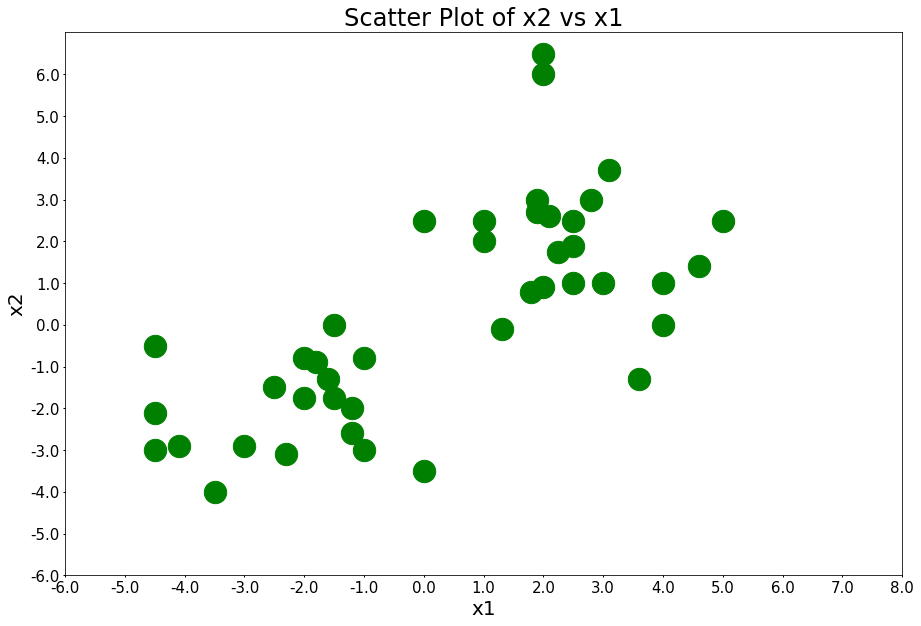

In [164]:
plot_points(figure_title='Scatter Plot of x2 vs x1')

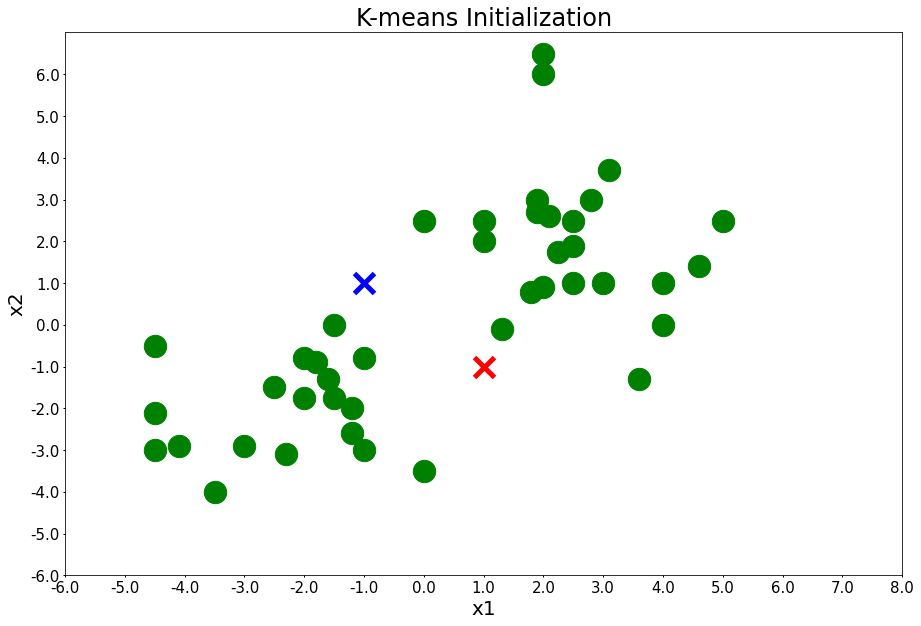

In [165]:
plot_points(centers, figure_title='K-means Initialization')

#### Run the iterations 4 times and plot each cluster assignment and plot each center update
Now use the functions that you have implemented and fill out the for loop  
You have to plot two scatter plot for each iteration, one after the cluster assignment and the second after updating the centers   

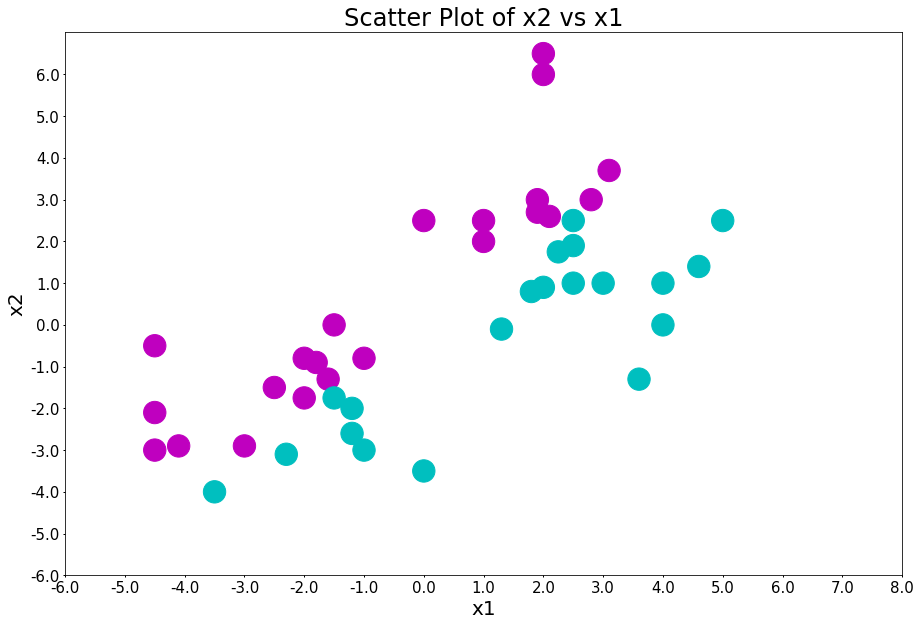

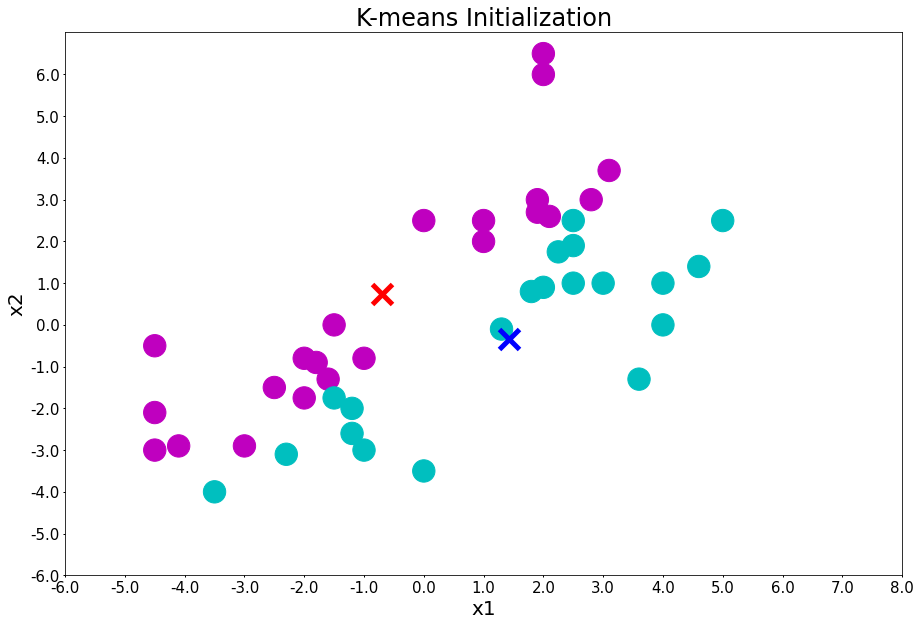

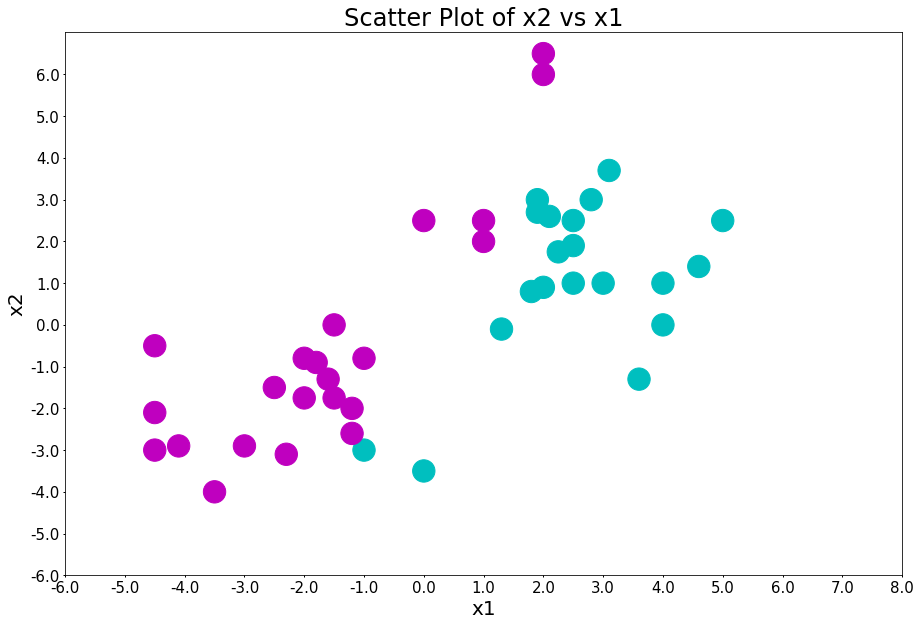

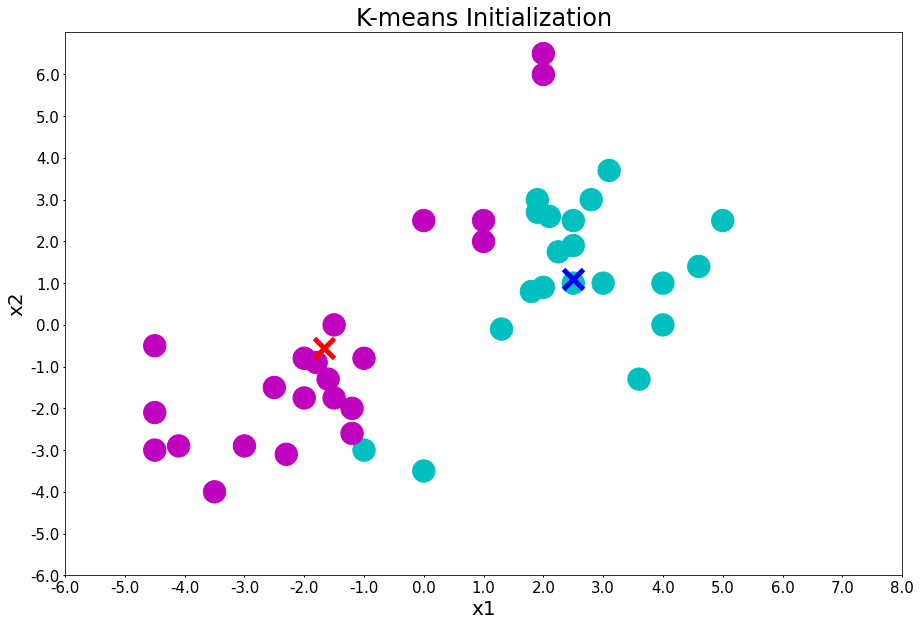

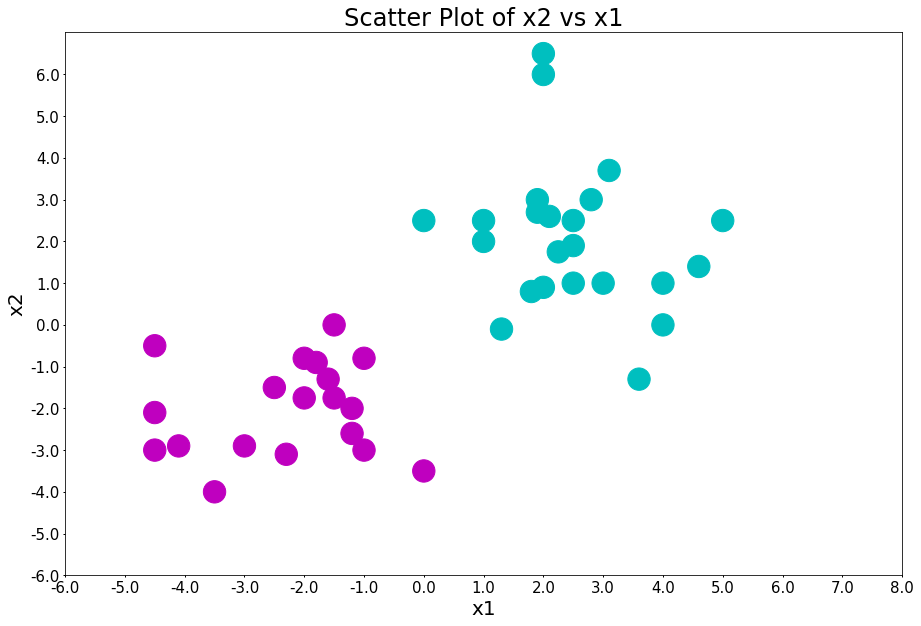

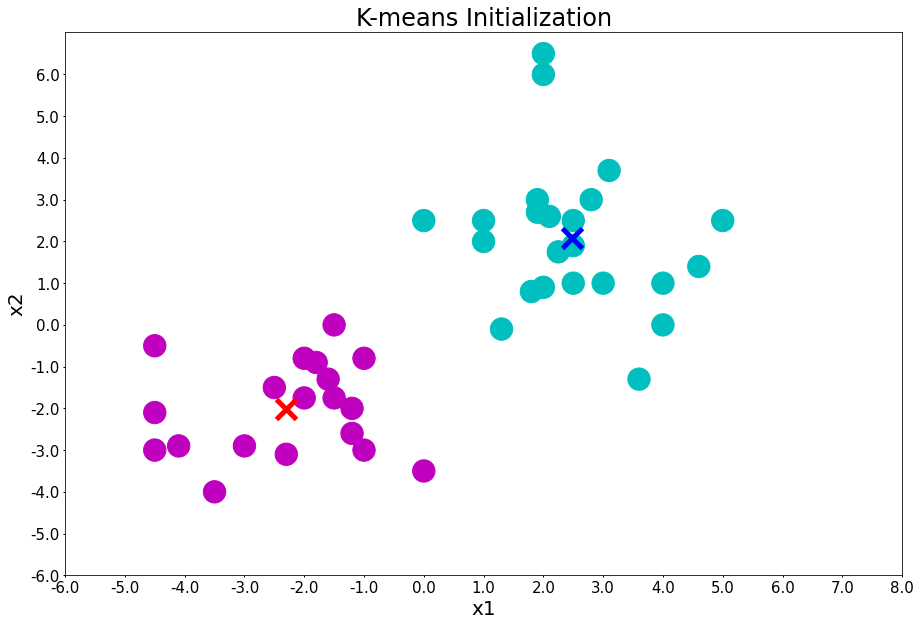

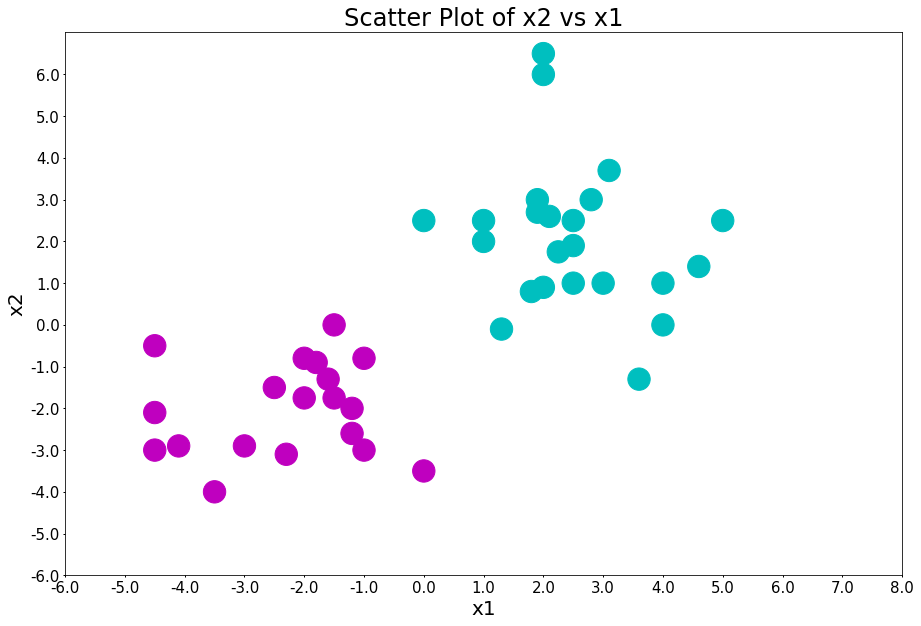

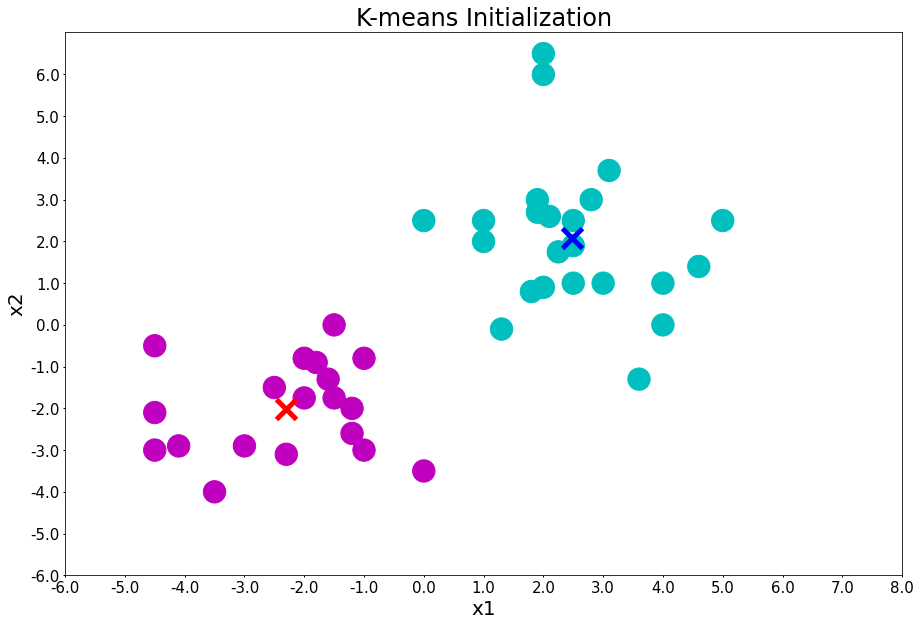

In [166]:
centers = [[1, -1], [-1, 1]]
number_of_iterations = 4
for i in range(0,number_of_iterations):
    # Your code goes here
    cop,colors = assign_members(x1,x2,centers)
    plot_points(figure_title='Scatter Plot of x2 vs x1', colors=colors)
    centers = update_centers(x1,x2,cop)
    plot_points(centers, figure_title='K-means Initialization', colors=colors)

    continue

### Q1 b) *k*-means for Cluster Segmentation and Profile Building

**Step 1)** Read the customer_segemntation csv file into a dataframe and display the first 5 rows

In [167]:
# Your code goes here
from google.colab import files
data_to_load = files.upload()
import io
df = pd.read_csv(io.BytesIO(data_to_load['customer_segmentation.csv']),encoding = "ISO-8859-1")

Saving customer_segmentation.csv to customer_segmentation (6).csv


In [168]:
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


**Step 2)** Drop any columns which will not be of any use (if any) and display the first 5 rows

In [169]:
# Your code goes here
#del df['Card Debt']
#del df['Other Debt']
del df['Address']
del df['Customer Id']
df.head(5)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


**Question:** Explain why you dropped those columns (if any)?

**Answer:** Customer Id is unique to each customer and basically acts as an index. Address is also unique to most customers. Since we are trying to basically find commonalities and patterns among our customers, we don't need these. 

**Step 3)** Check to see if there any NaN entries. Show the count of Nan entries for each column

In [170]:
# Your code goes here
print(df.isna().sum())

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64


**Step 4)** You can either drop these Nan entries or fill in the missing values. Show the first 5 rows and the count of Nan entries for each column after you have either dropped or filled the missing values

In [171]:
#Your code goes here
df = df.dropna()
print(df.isna().sum())
df

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
844,41,1,7,43,0.694,1.198,0.0,4.4
846,28,2,7,34,0.359,2.021,0.0,7.0
847,25,4,0,18,2.802,3.210,1.0,33.4
848,32,1,12,28,0.116,0.696,0.0,2.9


**Question:** Which method did you use to finish the NaN entries? And why is that method better than the other for K-Means clustering?

**Answer:** KMeans clustering is very sensitive to the mean of the clusters. If we use mode fill or back fill to fill the NaN values, we are skewing the underlying data and the output of Kmeans algorithm output will be affected by it. Therefore, dropping them is a better idea.

**Step 5)** Normalize your data and convert it into a numpy array. Normalization is a statistical method that helps mathematical-based algorithms interpret features with different magnitudes and distributions equally    
Hint: To Normalize checkout SKLearn library for any inbuilt function

In [172]:
# Your code goes here
arr =  df.to_numpy()
X = sklearn.preprocessing.StandardScaler().fit_transform(arr)# Normalized numpy array, used later in the visualization step
X

array([[ 0.76830405,  0.29879269, -0.35900652, ..., -0.60428433,
        -0.59494973, -0.58052847],
       [ 1.51908977, -0.77932527,  2.64702891, ...,  1.5706204 ,
        -0.59494973,  0.37222169],
       [-0.23274357,  0.29879269,  0.24220057, ...,  0.83520125,
         1.68081427,  1.55949495],
       ...,
       [-1.2337912 ,  2.45502862, -1.26081715, ...,  0.04620852,
         1.68081427,  3.39170678],
       [-0.35787453, -0.77932527,  0.54280411, ..., -0.71904138,
        -0.59494973, -1.07889008],
       [ 2.14474454, -0.77932527,  1.1440112 , ...,  0.17648972,
        -0.59494973, -0.24340149]])

**Step 6)** Here you will now use SK Learn's library for K-Means. 
You will use 4 clusters here.
Initailize the `n_init` parameter to equal 12

In [173]:
# Your code goes here

# Initialize
kmeans = KMeans(n_clusters=4, n_init=12)
# Fit
kmeans = kmeans.fit(X)
# Print labels
labels = kmeans.labels_
labels

array([0, 1, 2, 0, 3, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 2, 1, 3, 0, 0, 0, 1,
       1, 2, 0, 2, 2, 0, 2, 1, 2, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 3, 1, 3, 1, 1,
       2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 1, 0, 0, 1, 1, 0, 0, 2,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2,
       0, 0, 0, 3, 0, 2, 0, 0, 0, 2, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 2, 0, 2, 1, 0, 2, 1, 2, 0, 0, 3, 2, 2, 0, 0, 1, 2,
       1, 0, 1, 3, 0, 1, 2, 0, 2, 0, 1, 1, 2, 0, 0, 0, 2, 2, 1, 2, 1, 0,
       0, 0, 0, 3, 0, 2, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0, 2, 0, 0, 2, 2, 2,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 0, 0,
       2, 0, 1, 2, 0, 0, 0, 0, 1, 2, 2, 3, 0, 2, 0, 0, 2, 2, 1, 1, 1, 1,
       2, 0, 0, 2, 0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       3, 0, 0, 1, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 0,

**Question:** Here you have been provided with the number of clusters from before. Give two methods where you can find out the optimal number of clusters?  
**Answer:**  

**Step 7)** Add a column to your original dataframe with these labels and name the column `Labels`

In [174]:
# Your code goes here
Labels = labels.tolist()
df['Labels'] = Labels
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Labels
0,41,2,6,19,0.124,1.073,0.0,6.3,0
1,47,1,26,100,4.582,8.218,0.0,12.8,1
2,33,2,10,57,6.111,5.802,1.0,20.9,2
3,29,2,4,19,0.681,0.516,0.0,6.3,0
4,47,1,31,253,9.308,8.908,0.0,7.2,3
...,...,...,...,...,...,...,...,...,...
844,41,1,7,43,0.694,1.198,0.0,4.4,0
846,28,2,7,34,0.359,2.021,0.0,7.0,0
847,25,4,0,18,2.802,3.210,1.0,33.4,2
848,32,1,12,28,0.116,0.696,0.0,2.9,0


**Step 8)** Visualize your clusters. X is the normalized numpy array. You dont need to implement this, it has already been done for you. The following image shows what the result should more or less look like.
![Visual](Clusters.PNG)

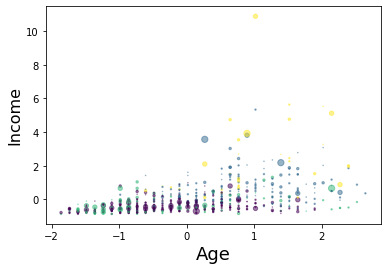

In [175]:
#Do not change this
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

**Step 9)** Here you will do profile building

K-means will partition your customers into four groups since we specified the algorithm to generate 4 clusters. The customers in each cluster are similar to each other in terms of the features included in the dataset.

Now we can create a profile for each group, considering the common characteristics of each cluster. 

Compare all 4 clusters and give main characterstics for each profile/cluster.  
For E.g The group which is older in `age` have a higher `income`

Hint: Use groupby

In [177]:
# Your code goes here
df2 = df.groupby(by=['Labels'])
df3 = df2[['Age','Edu','Years Employed','Income','DebtIncomeRatio', 'Card Debt', 'Other Debt']].mean()
df3['Proportion Defaulted'] = df2['Defaulted'].sum()/df2['Defaulted'].count()
df3

,Age,Edu,Years Employed,Income,DebtIncomeRatio,Card Debt,Other Debt,Proportion Defaulted
Labels,,,,,,,,
0,32.239521,1.640719,5.943114,30.928144,7.590120,0.667395,1.554440,0.000000
1,41.600000,1.611765,15.905882,71.805882,10.084706,2.062382,4.400788,0.023529
2,31.597561,1.884146,3.859756,31.256098,14.056707,1.573884,2.811689,0.975610
3,43.125000,2.343750,17.187500,133.062500,19.612500,7.995750,12.884469,0.593750


Characteristics for each cluster  
1. On average, 32 years old, 1.6 years of education, employed for 6 years, least income compared to the 4 clusters but have the least debt and debt to income ratio. None of them have defaulted. Although they are similar to cluster 3 in age, education, employment, and income, what is interesting is that they are much more financially responsible and none of them have defaulted.
2. On average, 41 years old, 1.6 years of education, employed for 16 years, second highest average income of all clusters. Unlikely to default. They are most similar to cluster 4 since both clusters are older and have higher income. However, they appear to be much more financially responsible as shown by the relatively lower debt to income ratio and very low chance of defaulting.
3. On average, 31 years old, 1.9 years of education, employed for 4 years, almost the same income level as cluster 1. Second highest debt to income ratio. Very likely to default. Although they are similar to cluster 1 in age, education, employment, and income, what is interesting is that they are extremely likely to default with 0.97 of them having defaulted.
4. On average, 43 years old, 2.3 years of education, employed for 17.1 years, highest average income of all clusters, highest debt and debt to income ratio of all 4 clusters. Second most likely to default. They are most similar to cluster 2 since both clusters are older and have higher income. However, they appear to spend alot more and thus have much higher debt. They are also much more likely than cluster 2 to default. 

**Question:** Give 2 advantages and 2 disavantages of using K Means Clustering over say a Hierarchal Clustering Method such a Agglomerative Clustering or a Density Based Clustering Method such as DB-Scan?

**Advantages**
1. Convergence is guaranteed.
2. Specialized to clusters of different sizes and shapes.

**Disadvantages**
1. K-Mean is difficult to predict
2. Doesn't work well with global cluster.

**Step 10)**
Save your data frame from step, 9 to an Excel or csv file format.

In [182]:
#Your code goes here
df3.to_csv('/content/customer_segments.csv')
files.download('customer_segments.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Q2) Hierarchical  Clustering
Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics. There are two types of hierarchical clustering algorithms:

*   Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters.
*   Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

In this question, you will be performing Agglomerative Clustering on a customers shopping habits dataset (in the file customers_shopping.csv) and then labelling the clusters.

**Question** Load the dataset and look for possible missing values. Handle them appropriately. (If any) 

In [134]:
### Code here
from google.colab import files
data_to_load = files.upload()
import io
df = pd.read_csv(io.BytesIO(data_to_load['customers_shopping.csv']),encoding = "ISO-8859-1")

Saving customers_shopping.csv to customers_shopping (1).csv


In [141]:
print(df.isna().sum())
df

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Task** Extract Annual Income and Spending score from the dataset

In [143]:
#Your code goes here
df2 = df.iloc[:, 3:5].values

**Question:** Create an agglomerative cluster using your optimal number of clusters and plot a scatter diagram

Text(0, 0.5, 'Spending Score (1-100)')

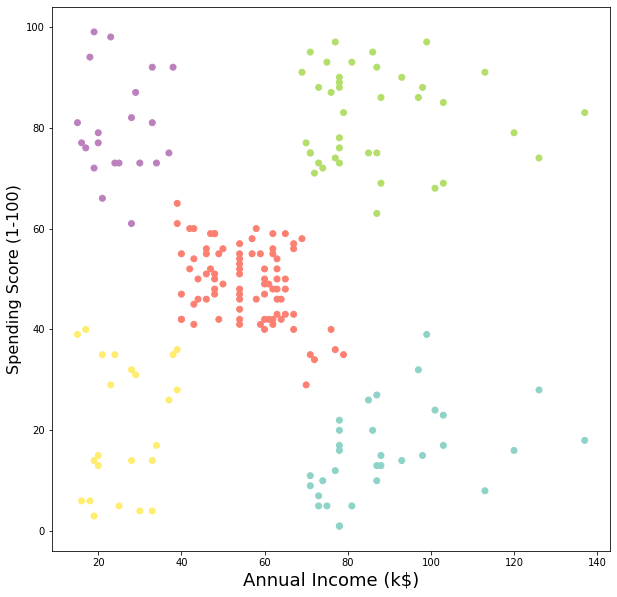

In [156]:
### write your code here
#cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df2)
plt.figure(figsize=(10, 10))
plt.scatter(df2[:,0], df2[:,1], c=cluster.labels_, cmap='Set3')
plt.xlabel('Annual Income (k$)', fontsize=18)
plt.ylabel('Spending Score (1-100)', fontsize=16)

**Question:** What do each of the clusters represent? Discuss.

**Answer:** 


1.   Yellow cluster represents customers with low income ($10,000-$40,000) who spend less (10-40). 
2.   Blue cluster represents customers with high income ($80,000-$140,000) who spend less (10-40).
3.   Peach cluster represents customers with medium income ($40,000-$80,000) with medium spendind (30-60).
4.   Purple cluster represents customers with low income ($10,000-$40,000) who spend more (60-100).
5.   Green cluster represents customers with high income ($80,000-$140,000) who spend more (60-100).